In [73]:
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd
import umap
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

## Common issues
- Usage of KMeans, linear regression, Naive Bayes, SVD
- Wrong data transformation methods like dummies

In [14]:
from sklearn.datasets import load_iris
df = load_iris(as_frame=True)['frame']
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [64]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df.target, test_size=0.2, random_state=7)
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape

((120, 4), (120,))

In [76]:
km = KMeans(n_clusters=3, random_state=42)
km.fit(x_train, y_train)
# print(classification_report(y_test, km.predict(x_test)))
silhouette_score(x_test, labels=y_test)

0.29236931439208014

Silhouette Score: 0.292
Explained Variance ratio: 0.961


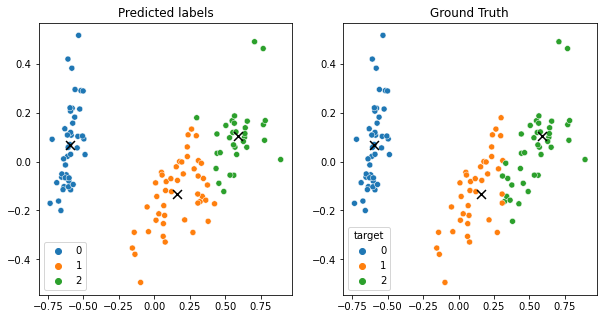

In [140]:
def fit_reduce_plot(data, target, plot='train'):
    x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=7)
    scaler = MinMaxScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)

    km = KMeans(n_clusters=3, random_state=42)
    km.fit(x_train, y_train)
    
    reducer = PCA(n_components=2, random_state=42)
    reducer.fit(x_train)
    reduced_train = reducer.transform(x_train)
    reduced_test = reducer.transform(x_test)
    centroids = km.cluster_centers_
    reduced_centroids = reducer.transform(centroids)
    color_map = {idx: color for idx, color in enumerate(sns.color_palette())}

    print(f'Silhouette Score: {silhouette_score(x_test, labels=y_test):.3f}')
    print(f'Explained Variance ratio: {sum(reducer.explained_variance_ratio_):.3f}')
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    if plot == 'train':
        sns.scatterplot(x=reduced_train[:, 0], y=reduced_train[:, 1], hue=km.predict(x_train), palette=color_map, ax=axes[0])
        axes[0].scatter(x=reduced_centroids[:, 0], y=reduced_centroids[:, 1], marker='x', color='black', s=80)
        # plt.show()
        sns.scatterplot(x=reduced_train[:, 0], y=reduced_train[:, 1], hue=y_train, palette=color_map, ax=axes[1])
        axes[1].scatter(x=reduced_centroids[:, 0], y=reduced_centroids[:, 1], marker='x', color='black', s=80)
        axes[0].title.set_text('Predicted labels')
        axes[1].title.set_text('Ground Truth')
    elif plot == 'test':
        sns.scatterplot(x=reduced_test[:, 0], y=reduced_test[:, 1], hue=km.predict(x_test), palette=color_map, ax=axes[0])
        axes[0].scatter(x=reduced_centroids[:, 0], y=reduced_centroids[:, 1], marker='x', color='black', s=80)
        sns.scatterplot(x=reduced_test[:, 0], y=reduced_test[:, 1], hue=y_test, palette=color_map, ax=axes[1])
        axes[1].scatter(x=reduced_centroids[:, 0], y=reduced_centroids[:, 1], marker='x', color='black', s=80)
    axes[0].title.set_text('Predicted labels')
    axes[1].title.set_text('Ground Truth')

fit_reduce_plot(df.drop('target', axis=1), df.target, plot='train')


Silhouette Score: 0.292


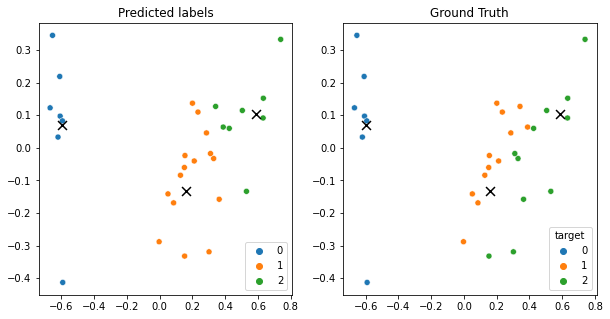

In [132]:
fit_reduce_plot(df.drop('target', axis=1), df.target, plot='test')

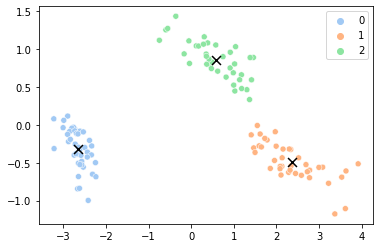

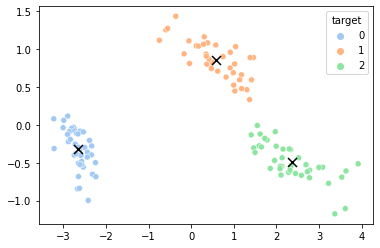

In [90]:
reducer = PCA(n_components=2, random_state=42)
reducer.fit(x_train)
reduced = reducer.transform(x_train)
centroids = km.cluster_centers_
reduced_centroids = reducer.transform(centroids)
color_map = {idx: color for idx, color in enumerate(sns.color_palette('pastel'))}

sns.scatterplot(x=reduced[:, 0], y=reduced[:, 1], hue=km.predict(x_train), palette=color_map)
plt.scatter(x=reduced_centroids[:, 0], y=reduced_centroids[:, 1], marker='x', color='black', s=80)
plt.show()
sns.scatterplot(x=reduced[:, 0], y=reduced[:, 1], hue=y_train, palette=color_map)
plt.scatter(x=reduced_centroids[:, 0], y=reduced_centroids[:, 1], marker='x', color='black', s=80)

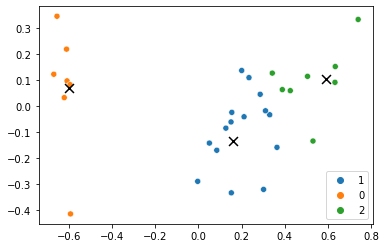

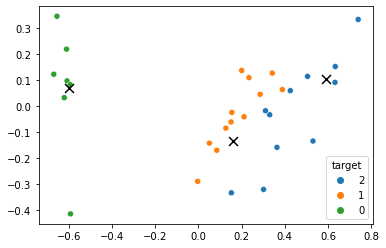

In [49]:
reducer = PCA(n_components=2)
reducer.fit(x_train)
reduced = reducer.transform(x_test)
centroids = km.cluster_centers_
reduced_centroids = reducer.transform(centroids)

sns.scatterplot(x=reduced[:, 0], y=reduced[:, 1], hue=km.predict(x_test).astype(str))
plt.scatter(x=reduced_centroids[:, 0], y=reduced_centroids[:, 1], marker='x', color='black', s=80)
plt.show()
sns.scatterplot(x=reduced[:, 0], y=reduced[:, 1], hue=y_test.astype(str))
plt.scatter(x=reduced_centroids[:, 0], y=reduced_centroids[:, 1], marker='x', color='black', s=80)

# Ordinal values with K-Means

In [127]:
df_categorical = df.copy()
df_categorical['colour'] = df.target
df_categorical

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,colour
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,2,2
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2


In [77]:
x_train, x_test, y_train, y_test = train_test_split(df_categorical.drop('target', axis=1), df_categorical.target, test_size=0.2, random_state=7)

km = KMeans(n_clusters=3, random_state=42)
km.fit(x_train, y_train)
# print(classification_report(y_test, km.predict(x_test)))
silhouette_score(x_test, labels=y_test)

0.4844947630856452

Silhouette Score: 0.555


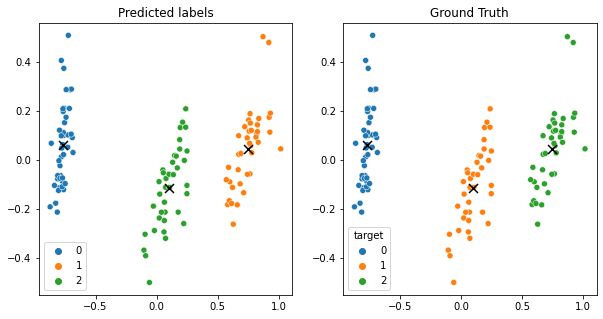

In [133]:
fit_reduce_plot(df_categorical.drop('target', axis=1), df_categorical.target, plot='train')

## Categorical values withh K-means

In [134]:
df_categorical = pd.concat([df, pd.get_dummies(df.target)], axis=1)
df_categorical

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,0,1,2
0,5.1,3.5,1.4,0.2,0,1,0,0
1,4.9,3.0,1.4,0.2,0,1,0,0
2,4.7,3.2,1.3,0.2,0,1,0,0
3,4.6,3.1,1.5,0.2,0,1,0,0
4,5.0,3.6,1.4,0.2,0,1,0,0
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,0,0,1
146,6.3,2.5,5.0,1.9,2,0,0,1
147,6.5,3.0,5.2,2.0,2,0,0,1
148,6.2,3.4,5.4,2.3,2,0,0,1


Silhouette Score: 0.793


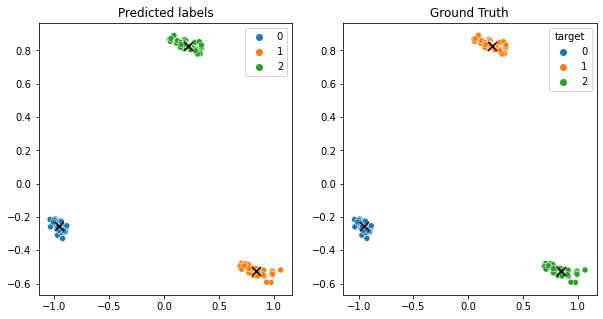

In [135]:
fit_reduce_plot(df_categorical.drop('target', axis=1), df_categorical.target, plot='train')

In [79]:
x_train, x_test, y_train, y_test = train_test_split(df_categorical.drop('target', axis=1), df_categorical.target, test_size=0.2, random_state=7)
x_train.shape, y_train.shape

((120, 7), (120,))

In [80]:
km = KMeans(n_clusters=3, random_state=42)
km.fit(x_train, y_train)
silhouette_score(x_test, labels=y_test)

0.5518947994504149

In [56]:
wholesale = pd.read_csv('data/wholesale_customers_data.csv')
wholesale

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [57]:
wholesale.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object